In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import cv2

%matplotlib notebook

In [2]:
def binary_sequence(rank):
    return list(itertools.product([0,1], repeat=rank))

def boundary_vectors(boundary_dims):
    '''
    Determines the boundary points based on the boundary dimensions
    
    Keyword arguments:
    boundary_dims -- tuple/array of integers specifying the boundary limits for the points
    '''
    
    return (boundary_dims-1)*binary_sequence(rank=len(boundary_dims))

In [29]:
def orthogonal_vectors(b_vecs):
    orth_vecs = []
    
    for v1 in b_vecs:
        for v2 in b_vecs:
            v_diff = np.logical_xor(v1,v2)
            
            if np.sum(v_diff) == 1 and [v2, v1] not in orth_vecs:
                i = np.argwhere(v_diff).flatten()[0]
                
                orth_vecs.append([v1, v2, i])
        
    return orth_vecs

def sutures(dims):
    sutures = []
    boundary_dims = np.array(dims, dtype='uint8')
    
    b_vecs = boundary_vectors(boundary_dims)
    
    # create cross-sutures
    for v in b_vecs:
        c_sut = np.zeros(len(v), dtype=v.dtype)
        
        for i, v_d in enumerate(v):
            if v_d == 0:
                c_sut[i] = 1
            else:
                c_sut[i] = v_d-1
        
        sutures.append([tuple(v), tuple(c_sut)])
    
    # create parallel sutures
    orth_vecs = orthogonal_vectors(b_vecs)
    
    print(orth_vecs)
    for v_start, v_end, ind in orth_vecs:
        
        a = v_start[ind]
        b = v_end[ind]

        if b-a-4 > 0:
            for i in range(a+2,b-1,1):
                p_sut = np.zeros(len(v_start), dtype=v_start.dtype)
                
                for i, v_d in enumerate(v_start):
                    if v_d == 0:
                        p_sut[i] = 1
                    else:
                        p_sut[i] = v_d-1
                    
                    sutures.append([tuple(v), tuple(p_sut)])
    print(sutures)
    
    return sutures

[[array([0, 0, 0]), array([0, 0, 4]), 2], [array([0, 0, 0]), array([0, 3, 0]), 1], [array([0, 0, 0]), array([2, 0, 0]), 0], [array([0, 0, 4]), array([0, 0, 0]), 2], [array([0, 0, 4]), array([0, 3, 4]), 1], [array([0, 0, 4]), array([2, 0, 4]), 0], [array([0, 3, 0]), array([0, 0, 0]), 1], [array([0, 3, 0]), array([0, 3, 4]), 2], [array([0, 3, 0]), array([2, 3, 0]), 0], [array([0, 3, 4]), array([0, 0, 4]), 1], [array([0, 3, 4]), array([0, 3, 0]), 2], [array([0, 3, 4]), array([2, 3, 4]), 0], [array([2, 0, 0]), array([0, 0, 0]), 0], [array([2, 0, 0]), array([2, 0, 4]), 2], [array([2, 0, 0]), array([2, 3, 0]), 1], [array([2, 0, 4]), array([0, 0, 4]), 0], [array([2, 0, 4]), array([2, 0, 0]), 2], [array([2, 0, 4]), array([2, 3, 4]), 1], [array([2, 3, 0]), array([0, 3, 0]), 0], [array([2, 3, 0]), array([2, 0, 0]), 1], [array([2, 3, 0]), array([2, 3, 4]), 2], [array([2, 3, 4]), array([0, 3, 4]), 0], [array([2, 3, 4]), array([2, 0, 4]), 1], [array([2, 3, 4]), array([2, 3, 0]), 2]]
[[(0, 0, 0), (1

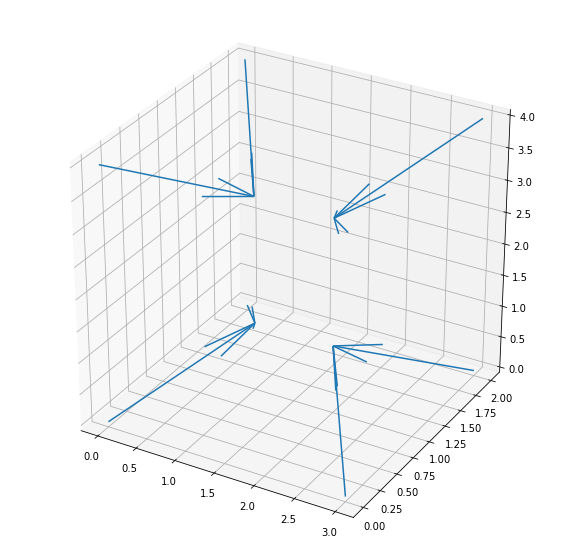

In [30]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

test = np.array(sutures((3,4,5)))

for i, st in enumerate(test):
    test[i][1] = test[i][1]-test[i][0]

t2 = test.reshape(test.shape[0], test.shape[1]*test.shape[2])

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

plt.quiver(t2[:,1], t2[:,0], t2[:,2], t2[:,4], t2[:,3], t2[:,5])
plt.show()